# Twitter News Organization Sentiment Analysis

### Summary of Findings
- It appears that the New York Times, followed by BBC News, tweet out the most neutral (sentiment-free) tweets. It appears that Fox News tweets are the most polarized (based on output from 11/20/2017)
- As of 11/20/2017 at 12pm, CNN shows the most negatively polarized tweets, on average. 
- AS of 11/20/2017 at 12pm, Fox News shows the most positively polarized tweets. Eyeballing the text of the highest-scoring positve tweets shows that they chose to retweet several positive Trump tweets in a row.  

In [93]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
import json
import tweepy
import time
from datetime import datetime

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


#### Set up Twitter API and Sentiment Analyzer

In [94]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Build sentiment analysis
#### Loop through last 100 tweets from 5 popular news organizations, and store sentiment analysis datasets for visualization

In [95]:
# Store current time in variable
now = datetime.now()

# Target Accounts
news_accounts = ["@CBSNews", "@FoxNews", "@CNN", "@BBCNews", "@NYTimes"]

# Arrays to hold master dataframe and mean aggregates
news_tweet_sentiments = []
news_sentiment_means = []

# Loop through each news organization
for account in news_accounts:
    # Initialize each organization's mean sentiment list
    org_compound_list = []
    org_positive_list = []
    org_negative_list = []
    org_neutral_list = []
    
    # Counter
    counter = 1
    
    # Get all tweets from organization's home feed
    public_tweets = api.user_timeline(account, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        # Date format in JSON is: "Fri Feb 09 00:35:02 +0000 2007"
        tweet_date = datetime.strptime(tweet["created_at"], '%a %b %d %X %z %Y')

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet_text)
        cmp = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiment values for each tweet into list of dictionaries for dataframe (of all tweets by news organization)
        news_tweet_sentiments.append({"User": account,
                                   "Date": tweet_date, 
                                   "Compound": cmp,
                                   "Positive": pos,
                                   "Negative": neg,
                                   "Neutral": neu,
                                   "Tweet Text": tweet_text,
                                   "Tweets Ago": tweets_ago})

        # Append values into arrays for the means (2nd chart)
        org_compound_list.append(cmp)
        org_positive_list.append(pos)
        org_negative_list.append(neg)
        org_neutral_list.append(neu)
        
        # Add to counter 
        counter = counter + 1
    
    # Store the mean sentiment values into separate array
    sentiment_mean = {"User": account,
                     "Compound": np.mean(org_compound_list),
                     "Positive": np.mean(org_positive_list),
                     "Neutral": np.mean(org_neutral_list),
                     "Negative": np.mean(org_negative_list),
                     "Tweet Count": len(org_compound_list)}

    news_sentiment_means.append(sentiment_mean)

#### Output dataframe for verification

In [96]:
# Convert master sentiments dataset into DataFrame
df_sentiments = pd.DataFrame(news_tweet_sentiments)

# Open and write to output file
csv_file = f"TwitterNewsSentimentAnalysis_{now.strftime('%m/%d/%Y %H%M')}.csv"
df_sentiments.to_csv(, index=False)

# Output top rows of dataframe
df_sentiments.head(50)

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.3612,2017-11-20 17:38:31+00:00,0.000,0.878,0.122,"""Thank you for all your love..."" David Cassidy...",1,@CBSNews
1,0.1511,2017-11-20 17:20:35+00:00,0.000,0.935,0.065,Santa Claus is coming to town! But if you want...,2,@CBSNews
2,0.0000,2017-11-20 17:06:38+00:00,0.000,1.000,0.000,"""We're going to have the wall. It's part of wh...",3,@CBSNews
3,0.4939,2017-11-20 17:05:40+00:00,0.000,0.849,0.151,"“So we'll be submitting plans on health care, ...",4,@CBSNews
4,0.7906,2017-11-20 17:03:01+00:00,0.077,0.588,0.335,"""We're going to give the American people a hug...",5,@CBSNews
5,-0.2960,2017-11-20 17:02:07+00:00,0.109,0.891,0.000,"""This designation will impose further sanction...",6,@CBSNews
6,0.0000,2017-11-20 17:00:27+00:00,0.000,1.000,0.000,“One of the primary goals of our trip was to p...,7,@CBSNews
7,0.0000,2017-11-20 16:57:30+00:00,0.000,1.000,0.000,WATCH: President Trump holds a cabinet meeting...,8,@CBSNews
8,0.0000,2017-11-20 16:55:31+00:00,0.000,1.000,0.000,These turkeys are living it up at this luxury ...,9,@CBSNews
9,0.7650,2017-11-20 16:48:02+00:00,0.000,0.694,0.306,Interested in becoming financially independent...,10,@CBSNews


#### Break up into datasets for each organization

In [97]:
# Define organization-specific datasets
df_cnn = df_sentiments[df_sentiments["User"] == "@CNN"]
df_bbc = df_sentiments[df_sentiments["User"] == "@BBCNews"]
df_fox = df_sentiments[df_sentiments["User"] == "@FoxNews"]
df_nyt = df_sentiments[df_sentiments["User"] == "@NYTimes"]
df_cbs = df_sentiments[df_sentiments["User"] == "@CBSNews"]
df_nyt.head(10)

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
400,0.5267,2017-11-20 17:40:09+00:00,0.000,0.861,0.139,Even if Democrats gain more seats in the 2018 ...,1,@NYTimes
401,0.0000,2017-11-20 17:30:16+00:00,0.000,1.000,0.000,"He was only 11 years older than Bill Cosby, hi...",2,@NYTimes
402,0.2500,2017-11-20 17:20:09+00:00,0.000,0.900,0.100,"What Al Franken’s photo and Trump’s ""Access Ho...",3,@NYTimes
403,-0.5106,2017-11-20 17:10:07+00:00,0.320,0.680,0.000,Because Thanksgiving dinner can be a stressful...,4,@NYTimes
404,-0.6808,2017-11-20 17:01:46+00:00,0.195,0.805,0.000,Breaking News: President Trump designated Nort...,5,@NYTimes
405,0.0000,2017-11-20 16:55:05+00:00,0.000,1.000,0.000,How much of Charles Manson do his songs reveal...,6,@NYTimes
406,0.4588,2017-11-20 16:46:19+00:00,0.188,0.551,0.261,RT @nytopinion: The intelligence of the bright...,7,@NYTimes
407,0.0000,2017-11-20 16:34:22+00:00,0.000,1.000,0.000,The Keystone XL pipeline got a final major per...,8,@NYTimes
408,0.0000,2017-11-20 16:20:04+00:00,0.000,1.000,0.000,NYT statement on Glenn Thrush: “We intend to f...,9,@NYTimes
409,0.0000,2017-11-20 16:10:06+00:00,0.000,1.000,0.000,Video: Charles Manson's cult following https:/...,10,@NYTimes


## Show scatter plots
#### Visualization of all 5 news organizations' last 100 tweet sentiment values

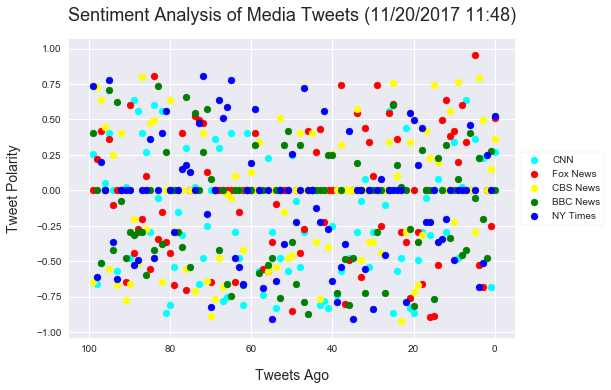

In [98]:
# Initialize label variables for each news org
lbl_cnn = "CNN"
lbl_fox = "Fox News"
lbl_cbs = "CBS News"
lbl_bbc = "BBC News"
lbl_nyt = "NY Times"

# Colors
color_cnn = "cyan"
color_fox = "red"
color_bbc = "green"
color_cbs = "yellow"
color_nyt = "blue"

# ***** SET AXIS TICKS, LABELS, LIMITS, AND TITLE ******
fig, ax = plt.subplots()
ax.set_xlim(105, -5)
ax.set_xlabel("Tweets Ago", fontsize=14)
ax.set_ylabel("Tweet Polarity", fontsize=14)   
ax.set_title(f"Sentiment Analysis of Media Tweets ({now.strftime('%m/%d/%Y %H:%M')})", fontsize=18)
ax.set_xmargin = 20

# ********* SCATTER PLOTTING ************
xaxis = np.arange(100)
handle_cnn = ax.scatter(xaxis, df_cnn["Compound"], facecolors=color_cnn, marker="o", label=lbl_cnn)
handle_fox = ax.scatter(xaxis, df_fox["Compound"], facecolors=color_fox, marker="o", label=lbl_fox)
handle_cbs = ax.scatter(xaxis, df_cbs["Compound"], facecolors=color_cbs, marker="o", label=lbl_cbs)
handle_bbc = ax.scatter(xaxis, df_bbc["Compound"], facecolors=color_bbc, marker="o", label=lbl_bbc)
handle_nyt = ax.scatter(xaxis, df_nyt["Compound"], facecolors=color_nyt, marker="o", label=lbl_nyt)
                     
# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

# Define scatter plot legend
ax.legend(handles=[handle_cnn, handle_fox, handle_cbs, handle_bbc, handle_nyt], frameon=True, facecolor="white", loc='center left', bbox_to_anchor=(1, 0.5))

# Output the scatter plot to file
plt.savefig(f"TwitterNewsSentimentAnalysis_Scatter_{now.strftime('%m-%d-%Y %H%M')}.png")

# Show scatter plot
plt.show()

## Visualize sentiment aggregate analysis
#### Output mean compound sentiment analysis as bar charts, for last 100 tweets of each organization

In [99]:
# Convert sentiment means dataset into DataFrame
df_sentiment_means = pd.DataFrame(news_sentiment_means)
df_sentiment_means.head(10)

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,-0.047274,0.09139,0.83124,0.07738,100,@CBSNews
1,-0.029757,0.10361,0.81189,0.08454,100,@FoxNews
2,-0.168575,0.12965,0.81172,0.05865,100,@CNN
3,-0.117122,0.12029,0.82473,0.05496,100,@BBCNews
4,-0.054888,0.09714,0.83305,0.06979,100,@NYTimes


In [100]:
# Create series holding our aggregate dataset
sentiment_mean = pd.Series([df_sentiment_means.at[2, "Compound"], 
                            df_sentiment_means.at[1, "Compound"],
                            df_sentiment_means.at[0, "Compound"],
                            df_sentiment_means.at[3, "Compound"],
                            df_sentiment_means.at[4, "Compound"]
                           ],
                           [lbl_cnn, lbl_fox, lbl_cbs, lbl_bbc, lbl_nyt]
                          )

sentiment_mean

CNN        -0.168575
Fox News   -0.029757
CBS News   -0.047274
BBC News   -0.117122
NY Times   -0.054888
dtype: float64

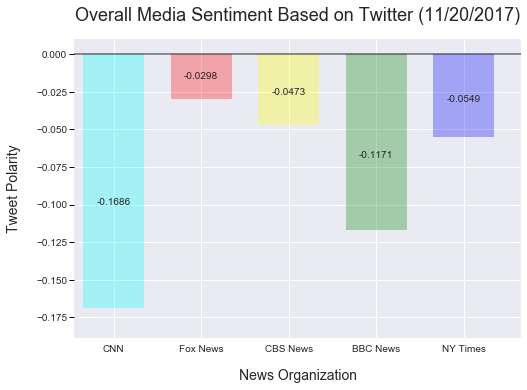

In [101]:
# Define our Bar chart 
x_axis = np.arange(0, 5, 1)
barwidth = 0.7       # the width of the bars

# Create our axis variable
fig, ax = plt.subplots()

# Define bars
colors = [color_cnn, color_fox, color_cbs, color_bbc, color_nyt]
rects = ax.bar(x_axis, sentiment_mean, color=colors, alpha=0.3, align="edge", width=barwidth)

# Draw a horizontal line at y=0
ax.hlines(0, -0.1, 10, alpha=0.5)
    
# Set the limits of the x axis (with some whitespace to left and right)
ax.set_xlim(-0.1, len(x_axis))

# Set the limits of the y axis (add some whitespace to the top/bottom of the chart)
ax.set_ylim(min(sentiment_mean) - .02, max(sentiment_mean) + .04)

# add some text for labels, title and axes ticks
ax.set_ylabel("Tweet Polarity", fontsize=14)
ax.set_xlabel("News Organization", fontsize=14)
ax.set_title(f"Overall Media Sentiment Based on Twitter ({now.strftime('%m/%d/%Y')})", fontsize=18)

# Create the ticks for our bar chart's x axis
ax.tick_params(direction="out", color="black", width=1, length=5, axis="y", pad=2)
ax.set_xticks([value+0.35 for value in x_axis])
ax.set_xticklabels(sentiment_mean.index)

# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

def autolabel(rects):
    '''
    Attach a text label above each bar displaying its height
    '''
    for rect in rects:
        height = rect.get_height() # Get the exact height of the bar
        height_formatted = "{0:.4f}".format(rect.get_height())  # format display of value
        ax.text(rect.get_x() + rect.get_width()/2, 0.6*height, height_formatted, ha='center', va='bottom')

# Add labels to our bars
autolabel(rects)

# Output the bar chart to file
plt.savefig(f"TwitterNewsSentimentAnalysis_OverallMeans_Bar_{now.strftime('%m-%d-%Y %H%M')}.png")

# Display bar chart
plt.show()
